In [ ]:
# Here we'll classify the MNIST dataset of Handwritten Images
# This is an example of multi-class classification
# 10 classes: labels 0-9

In [1]:
# Keras is now a higher level API within Tensorflow!
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam,RMSprop
import matplotlib.pyplot as plt

In [2]:
# Load MNIST dataset
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
# Convert to floating point and divide data by 255 to normalise.Tensorflow expects this format

# 60k training images, 28*28 pixels per image to 1D array of 784 pixels
trainImages = mnist_train_images.reshape(60000,784)
testImages = mnist_test_images.reshape(10000,784)

trainImages = trainImages.astype('float32')
testImages = testImages.astype('float32')

trainImages /= 255
testImages /= 255


In [5]:
# Convert 0-9 labels to into one hot format 
trainLabels = keras.utils.to_categorical(mnist_train_labels,10)
testLabels = keras.utils.to_categorical(mnist_test_labels,10)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


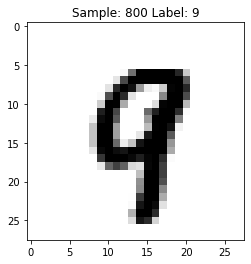

In [6]:
# Visualise training images
def displayImage(number):
  # Check one hot array of image label
  print(trainLabels[number])
  # Convert label bact to 0-9
  label = trainLabels[number].argmax(axis=0)
  # Reshape 1D tensor (768 pixels) into 28*28 image
  image = trainImages[number].reshape([28,28])
  # Show image
  plt.title('Sample: %d Label: %d' % (number, label))
  plt.imshow(image,cmap=plt.get_cmap('gray_r'))
  plt.show()

displayImage(800)

In [7]:
# Build our neural network
model = Sequential()
# Dense layer: hidden layer of neurons. Here 512 neurons with input shape of 784 neurons
model.add(Dense(512,activation='relu',input_shape=(784,)))
# To prevent overfitting, drop 20% of neurons to spread out learning
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
# Softmax function to map classification to label 0-9
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Compile our model with optimiser and loss function
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])
# Train the model
model.fit(trainImages,trainLabels,batch_size=100,epochs=10,verbose=2,validation_data=(testImages,testLabels))

Epoch 1/10
600/600 - 5s - loss: 0.2363 - accuracy: 0.9275 - val_loss: 0.1132 - val_accuracy: 0.9627
Epoch 2/10
600/600 - 1s - loss: 0.1029 - accuracy: 0.9694 - val_loss: 0.0790 - val_accuracy: 0.9754
Epoch 3/10
600/600 - 1s - loss: 0.0772 - accuracy: 0.9772 - val_loss: 0.0794 - val_accuracy: 0.9795
Epoch 4/10
600/600 - 1s - loss: 0.0636 - accuracy: 0.9812 - val_loss: 0.0775 - val_accuracy: 0.9797
Epoch 5/10
600/600 - 2s - loss: 0.0530 - accuracy: 0.9840 - val_loss: 0.0907 - val_accuracy: 0.9778
Epoch 6/10
600/600 - 1s - loss: 0.0484 - accuracy: 0.9863 - val_loss: 0.0765 - val_accuracy: 0.9818
Epoch 7/10
600/600 - 1s - loss: 0.0433 - accuracy: 0.9877 - val_loss: 0.0810 - val_accuracy: 0.9818
Epoch 8/10
600/600 - 2s - loss: 0.0402 - accuracy: 0.9888 - val_loss: 0.0963 - val_accuracy: 0.9791
Epoch 9/10
600/600 - 1s - loss: 0.0349 - accuracy: 0.9901 - val_loss: 0.0895 - val_accuracy: 0.9830
Epoch 10/10
600/600 - 1s - loss: 0.0343 - accuracy: 0.9905 - val_loss: 0.0913 - val_accuracy: 0.9815

In [9]:
testScores = model.evaluate(testImages,testLabels,verbose=0)
print('Test Loss: ',testScores[0])
print('Test Accuracy: ',testScores[1])

Test Loss:  0.09127877652645111
Test Accuracy:  0.9815000295639038


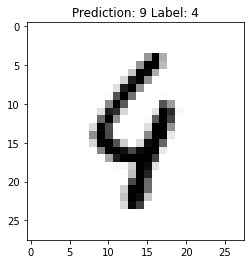

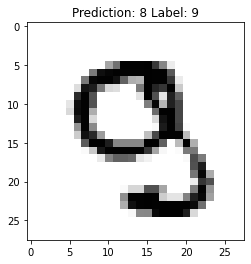

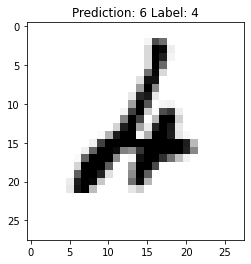

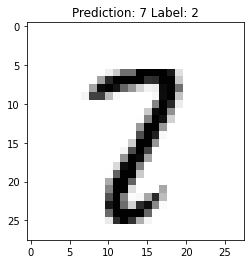

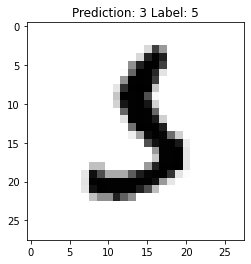

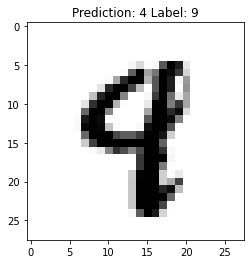

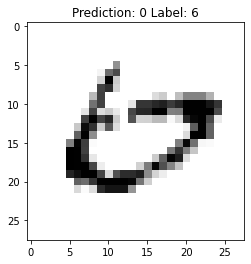

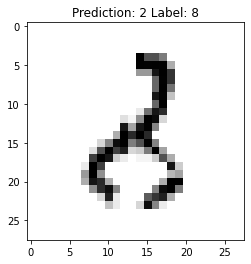

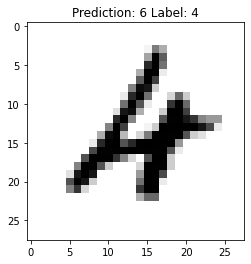

In [ ]:
# Let's look at the one's that were misclassified
for i in range(1000):
  image = testImages[i,:].reshape(1,784)
  prediction = model.predict(image).argmax()
  label = testLabels[i].argmax()
  if(prediction != label):
    plt.title('Prediction: %d Label: %d' % (prediction, label))
    plt.imshow(image.reshape(28,28),cmap=plt.get_cmap('gray_r'))
    plt.show()